## Deep Fake Detection Challenge

### Data Processing

##### Imports

In [21]:
import os
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

##### Data Description

In [22]:
train_videoes = "data/train_sample_videos"
test_videos = "data/test_videos"

print(f"Train Videoes: {len(os.listdir(train_videoes))}\nTest Vidoes: {len(os.listdir(test_videos))}")

Train Videoes: 401
Test Vidoes: 400


In [23]:
meta_data = pd.read_json(train_videoes+"/metadata.json").T
meta_data.head()

,label,split,original
aagfhgtpmv.mp4,FAKE,train,vudstovrck.mp4
aapnvogymq.mp4,FAKE,train,jdubbvfswz.mp4
abarnvbtwb.mp4,REAL,train,None
abofeumbvv.mp4,FAKE,train,atvmxvwyns.mp4
abqwwspghj.mp4,FAKE,train,qzimuostzz.mp4


In [101]:
def visualize_real_vs_fake(class_count: list, fake_proportion: np.float64, real_proportion: np.float64) -> None:
    plt.pie(class_count, labels=["Real", "Fake"])
    plt.title("Proportion of Real vs Deep Fake videos in the training dataset.")
    plt.legend([f"Real Videos: {real_proportion}%", f"Deep Fake Videos: {fake_proportion}%"], bbox_to_anchor=(0.5, 0.05), bbox_transform=plt.gcf().transFigure, loc="lower center")
    plt.savefig("images/pie_chart_class_proportions.jpg")
    plt.show()

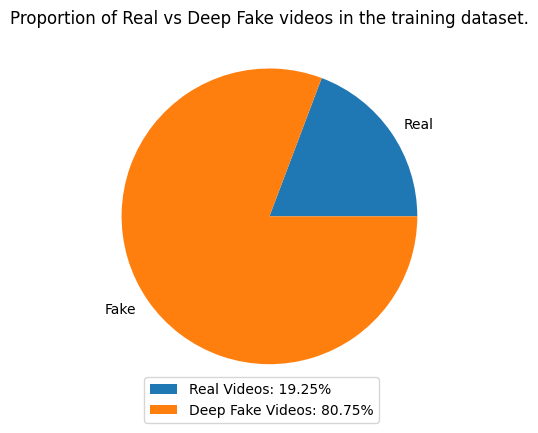

In [102]:
label_count_series = meta_data["label"].value_counts()
fake_count = label_count_series["FAKE"]
real_count = label_count_series["REAL"]

real_proportion = (real_count/(fake_count+real_count))*100
fake_proportion = (fake_count/(fake_count+real_count))*100

visualize_real_vs_fake([real_count, fake_count], fake_proportion, real_proportion)

Quite skewed dataset. Might want to consider upsampling of real classes